In [ ]:
import numpy as np
import pandas as pd
import sys, os
import math
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D

In [442]:
class LinearRegression:
    """
    Linear regression model
    num_iters: number of iterations
    alpha: learning rate
    w: (n x 1) weight vector
    """

    def __init__(self, num_iters=100, alpha=0.01):
        self.alpha = alpha
        self.num_iters = num_iters


    def train(self, X, y):
        """Trains model using gradient descent."""
        # Initialize weights randomly
        self.w = np.random.randn(1, X.shape[1])[0]

        # gradient descent for num_iters iterations
        for _ in range(self.num_iters):
            # Update the weights
            self.w -= self.alpha * -(y - X.dot(self.w)).dot(X)
        
        return [self.alpha, self.num_iters] + self.w.tolist()

In [427]:

# infile, outfile = sys.argv[1], sys.argv[2]
# inpath = os.path.join(os.getcwd(), infile)
# outpath = os.path.join(os.getcwd(), outfile)

inpath = os.path.join(os.getcwd(), "./starter/data2.csv")
outpath = os.path.join(os.getcwd(), "./starter/results2.csv")


In [428]:
df = pd.read_csv(inpath, header=None)
data = df.values

In [429]:
# normalize data
for i in range(data.shape[1] - 1):
    data[:, i] = (data[:, i] - np.mean(data[:, i])) / np.std(data[:, i])

# Insert constant ones for y-intercept
data = np.insert(data, 0, 1, axis=1)

# Split data into features and labels
X, y = data[:, :-1], data[:, -1]

In [430]:
ALPHAS = [
    (0.001, 100),
    (0.005, 100),
    (0.01, 100),
    (0.05, 100),
    (0.1, 100),
    (0.5, 100),
    (1, 100),
    (5, 100),
    (10, 100),
    (0.005, 1000),
]
results = np.empty(shape=(0, 5))
for alpha, num_iters in ALPHAS:
    model = LinearRegression(num_iters, alpha)
    results = np.vstack((results, model.train(X, y)))

results_df = pd.DataFrame(
    data=results, columns=["alpha", "num_iters", "bias", "b_age", "b_weight"]
)

results_df.to_csv(outpath, index=False, header=False)
weights = results[:, 2:]

In [438]:
def visualize_3d(df, lin_reg_weights=[1,1,1], feat1=0, feat2=1, labels=2,
                 xlim=(-2, 2), ylim=(-2, 2), zlim=(0, 3),
                 alpha=0., xlabel='age', ylabel='weight', zlabel='height',
                 title=''):
    """ 
    3D surface plot. 
    Main args:
      - df: dataframe with feat1, feat2, and labels
      - feat1: int/string column name of first feature
      - feat2: int/string column name of second feature
      - labels: int/string column name of labels
      - lin_reg_weights: [b_0, b_1 , b_2] list of float weights in order
    Optional args:
      - x,y,zlim: axes boundaries. Default to -1 to 1 normalized feature values.
      - alpha: step size of this model, for title only
      - x,y,z labels: for display only
      - title: title of plot
    """

    # Setup 3D figure
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(projection='3d')
    # Add scatter plot
    ax.scatter(df[feat1], df[feat2], df[labels])

    # Set axes spacings for age, weight, height
    axes1 = np.arange(xlim[0], xlim[1], step=.05)  # age
    axes2 = np.arange(xlim[0], ylim[1], step=.05)  # weight
    axes1, axes2 = np.meshgrid(axes1, axes2)
    axes3 = np.array( [lin_reg_weights[0] +
                       lin_reg_weights[1]*f1 +
                       lin_reg_weights[2]*f2  # height
                       for f1, f2 in zip(axes1, axes2)] )
    plane = ax.plot_surface(axes1, axes2, axes3, cmap=cm.Spectral,
                            antialiased=False, rstride=1, cstride=1)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.set_xlim3d(xlim)
    ax.set_ylim3d(ylim)
    ax.set_zlim3d(zlim)

    if title == '':
        title = 'LinReg Height with Alpha %f' % alpha
    ax.set_title(title)

    ax.view_init(2, 60)
    # for ii in np.arange(0, 360, 1):
    #   ax.view_init(elev=32, azim=ii)
    #   fig.savefig('./gif/gif_image%d.png' % ii)

    plt.show()

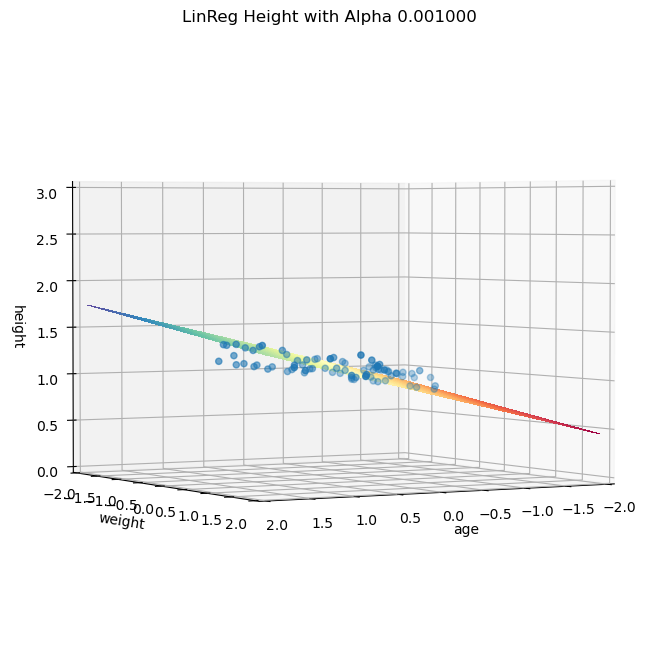

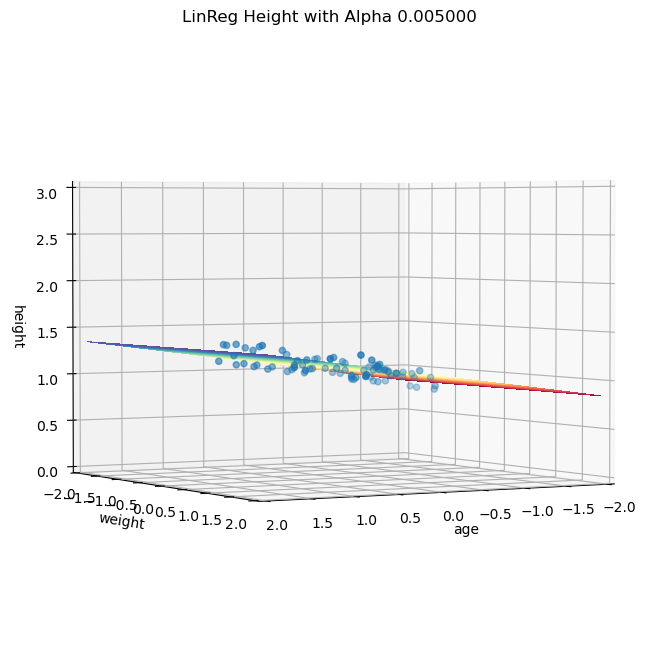

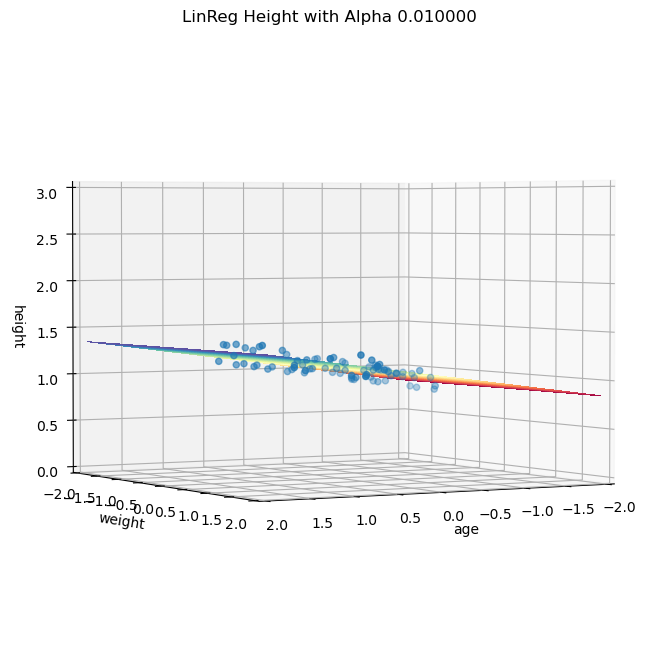

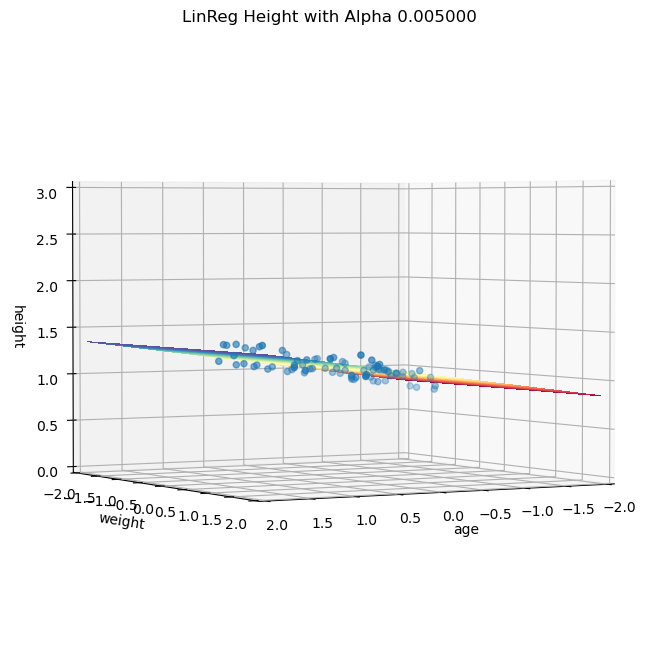

In [441]:
visualize_3d(df, lin_reg_weights=weights[0], alpha=ALPHAS[0][0])
visualize_3d(df, lin_reg_weights=weights[1], alpha=ALPHAS[1][0])
visualize_3d(df, lin_reg_weights=weights[2], alpha=ALPHAS[2][0])
visualize_3d(df, lin_reg_weights=weights[9], alpha=ALPHAS[9][0])